# Exploratory Data Analysis (EDA) Overview

**What is EDA?**  
Exploratory Data Analysis (EDA) is the process of analyzing data sets to summarize their main characteristics, often using visual methods. It is a critical step in understanding the structure of your data, uncovering patterns, spotting anomalies, and testing hypotheses before applying formal modeling techniques.

**Dataset Used:**  
We are working with the **Iris dataset**, a well-known dataset in data science that includes measurements (sepal length, sepal width, petal length, petal width) for 150 iris flowers, along with their species classification. This dataset is ideal for demonstrating various EDA techniques because of its simplicity and multiple variable types.


## Measures of Central Tendency, Variance, and Standard Deviation
  
These measures help summarize and describe the main features of a dataset:
- **Central Tendency:** Gives a central value for the data.
- **Variability:** Shows how much the data values differ from the central value.

**Formulas:**

1. **Mean (Average):**
   $$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$
   *Gives the average value of all observations.*

2. **Median:**  
   The middle value when the data is sorted.  
   *Useful when the data has outliers, as it is more robust than the mean.*

3. **Mode:**  
   The most frequently occurring value in the dataset.

4. **Variance:**  
   $$ \sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$
   *Measures the spread of the data around the mean.*

5. **Standard Deviation:**  
   $$ \sigma = \sqrt{\sigma^2} $$
   *Provides the dispersion in the same units as the data.*


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display first few rows of the dataset
print("Iris Dataset Head:")
print(iris.head())

# Calculate central tendency measures for the 'sepal_length' column
mean_val = iris['sepal_length'].mean()
median_val = iris['sepal_length'].median()
mode_val = iris['sepal_length'].mode()[0]

print("\nMeasures for 'sepal_length':")
print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)

# Calculate variance and standard deviation
variance_val = iris['sepal_length'].var()
std_dev = iris['sepal_length'].std()

print("\nVariance:", variance_val)
print("Standard Deviation:", std_dev)


Iris Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Measures for 'sepal_length':
Mean: 5.843333333333334
Median: 5.8
Mode: 5.0

Variance: 0.6856935123042505
Standard Deviation: 0.8280661279778629


## Resampling
 
Resampling is used to change the frequency of time-series data. It helps in smoothing out noise or preparing data for specific time-based analyses (e.g., converting daily data to weekly averages).

**Key Concepts:**
- **Downsampling:** Aggregating data from a higher frequency to a lower frequency (e.g., daily to weekly).
- **Upsampling:** Increasing the frequency of data points (e.g., daily to hourly), usually followed by an imputation step.

*In the next cell, we simulate a time-series and apply downsampling to compute weekly averages.*


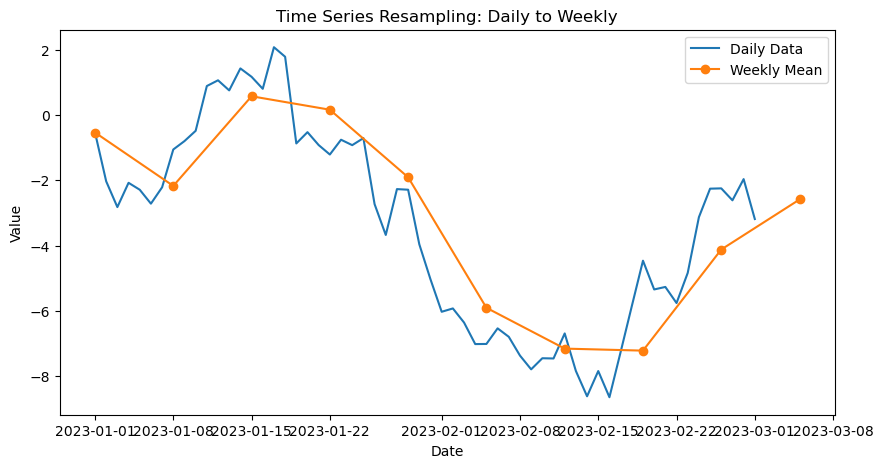

In [10]:
import matplotlib.pyplot as plt

# Create a time-series dataset with a daily frequency over 60 days
date_range = pd.date_range(start='2023-01-01', periods=60, freq='D')
ts_data = pd.DataFrame({
    'date': date_range,
    'value': np.random.randn(60).cumsum()  # cumulative sum to simulate a trend
})
ts_data.set_index('date', inplace=True)

# Downsample the data to a weekly frequency using the mean
weekly_data = ts_data.resample('W').mean()

# Plot the original and resampled data
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data['value'], label='Daily Data')
plt.plot(weekly_data.index, weekly_data['value'], 'o-', label='Weekly Mean')
plt.title("Time Series Resampling: Daily to Weekly")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


## Handling Missing Values
  
Missing data can distort the results of your analysis. Handling missing values ensures that your conclusions are based on complete information. Common methods include:
- **Detection:** Identifying missing entries.
- **Removal:** Dropping rows/columns with missing values.
- **Imputation:** Filling in missing values using statistical methods.

**Imputation Example:**  
Filling missing values with the mean:  
$$ x_{\text{imputed}} = \bar{x} $$  
This method replaces missing values with the average of the column.


In [11]:
# Introduce missing values into the Iris dataset (for demonstration)
iris_missing = iris.copy()
# Randomly assign NaN to 5% of the 'petal_length' values
np.random.seed(42)
missing_indices = np.random.choice(iris_missing.index, size=int(0.05 * len(iris_missing)), replace=False)
iris_missing.loc[missing_indices, 'petal_length'] = np.nan

# Check for missing values
print("Missing Values in Each Column:")
print(iris_missing.isnull().sum())

# Impute missing values with the mean of the column
iris_missing['petal_length'] = iris_missing['petal_length'].fillna(iris_missing['petal_length'].mean())
print("\nAfter imputation, missing values:")
print(iris_missing.isnull().sum())


Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    7
petal_width     0
species         0
dtype: int64

After imputation, missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Detecting Atypical Values (Outliers)
  
Outliers can indicate variability in measurement or experimental errors. Detecting outliers helps in understanding data quality and sometimes in deciding whether to exclude such points from further analysis.

**IQR (Interquartile Range) Method:**

1. Compute Q1 (25th percentile) and Q3 (75th percentile).
2. Calculate IQR:
   $$ \text{IQR} = Q3 - Q1 $$
3. Determine outlier boundaries:
   $$ \text{Lower Bound} = Q1 - 1.5 \times \text{IQR} $$
   $$ \text{Upper Bound} = Q3 + 1.5 \times \text{IQR} $$
Any value outside these bounds is considered a potential outlier.


Outliers in 'sepal_width':
    sepal_width
15          4.4
32          4.1
33          4.2
60          2.0


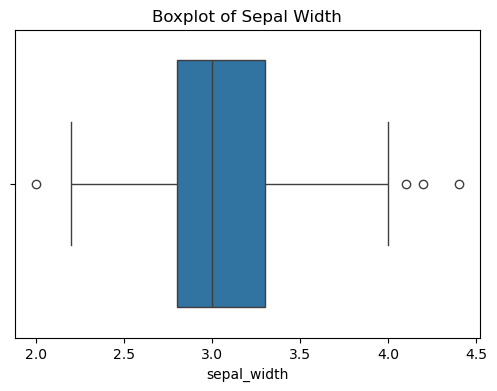

In [12]:
# Use the IQR method to detect outliers in 'sepal_width'
Q1 = iris['sepal_width'].quantile(0.25)
Q3 = iris['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = iris[(iris['sepal_width'] < lower_bound) | (iris['sepal_width'] > upper_bound)]
print("Outliers in 'sepal_width':")
print(outliers[['sepal_width']])

# Plot a boxplot for visualization
plt.figure(figsize=(6,4))
sns.boxplot(x=iris['sepal_width'])
plt.title("Boxplot of Sepal Width")
plt.show()


## Correlation and Covariance
  
These measures help us understand the relationship between variables:
- **Covariance:** Indicates the direction of the linear relationship between variables.
- **Correlation:** Standardizes covariance to a range between -1 and 1, indicating both the strength and direction of the relationship.

**Formulas:**

1. **Covariance:**  
   $$ \text{cov}(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

2. **Correlation (Pearson):**  
   $$ r = \frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2 \sum_{i=1}^{n}(y_i-\bar{y})^2}} $$


Covariance Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


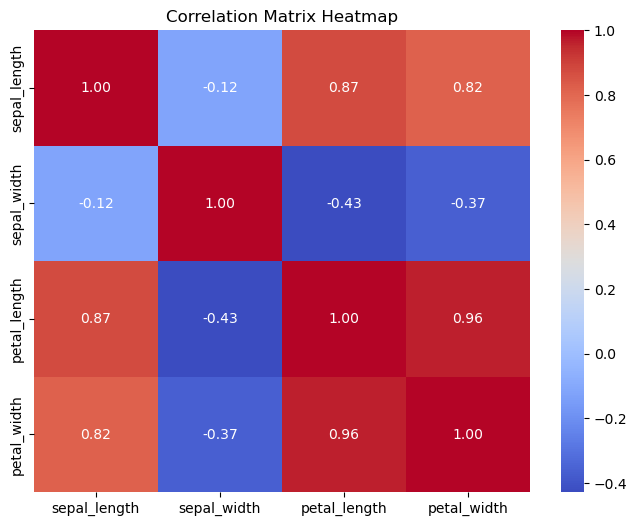

In [13]:
# Select only numeric columns from the dataset
numeric_iris = iris.select_dtypes(include=[np.number])

# Calculate covariance matrix for the numeric columns
cov_matrix = numeric_iris.cov()
print("Covariance Matrix:")
print(cov_matrix)

# Calculate correlation matrix for the numeric columns
corr_matrix = numeric_iris.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


## Confusion Matrix
  
A confusion matrix is a tool used to evaluate the performance of a classification model by summarizing the correct and incorrect predictions.

**Components:**
- **True Positives (TP):** Correctly predicted positive cases.
- **True Negatives (TN):** Correctly predicted negative cases.
- **False Positives (FP):** Incorrectly predicted positive cases.
- **False Negatives (FN):** Incorrectly predicted negative cases.

*While there isn't a specific formula for a confusion matrix, its structure is crucial for calculating metrics such as accuracy, precision, recall, and F1-score.*


Confusion Matrix:
[[4 1]
 [1 4]]


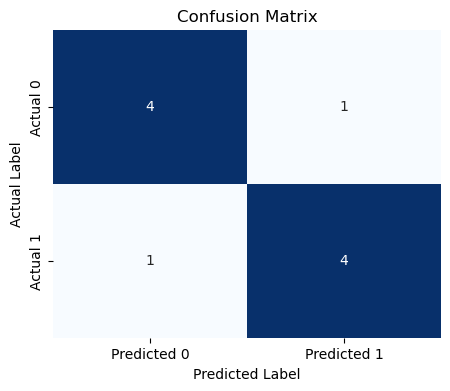

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate true labels and predicted labels for a binary classification problem
true_labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
predicted_labels = np.array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


## Conclusion

In this notebook, we:
- Introduced the concept of EDA and the Iris dataset.
- Reviewed key statistical measures (mean, median, mode, variance, standard deviation) with formulas.
- Applied resampling techniques to time-series data.
- Demonstrated methods to handle missing values.
- Detected atypical values (outliers) using the IQR method.
- Computed and visualized correlation and covariance to understand relationships between variables.
- Built and visualized a confusion matrix to evaluate a classification task.

This combination of theory (with formulas) and code helps provide a comprehensive foundation in exploratory data analysis.
